In [2]:
import pandas as pd
import pickle
from pandas import DataFrame, np
import matplotlib.pyplot as plt

In [3]:
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [4]:
df = DataFrame(data_dict)

In [5]:
df.head()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN


In [6]:
df.transpose().head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, bonus to total_stock_value
Columns: 146 entries, ALLEN PHILLIP K to YEAP SOON
dtypes: object(146)
memory usage: 24.7+ KB


In [8]:
df.transpose().info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [9]:
df_modified = df.drop(['poi', 'email_address']).astype(float)
df_modified = df_modified.drop(['TOTAL', 'LOCKHART EUGENE E', 'THE TRAVEL AGENCY IN THE PARK'], axis=1)
y_original = df.transpose()['poi']

In [10]:
df_modified.transpose().info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 19 columns):
bonus                        81 non-null float64
deferral_payments            38 non-null float64
deferred_income              48 non-null float64
director_fees                16 non-null float64
exercised_stock_options      101 non-null float64
expenses                     94 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                3 non-null float64
long_term_incentive          65 non-null float64
other                        91 non-null float64
restricted_stock             109 non-null float64
restricted_stock_deferred    17 non-null float64
salary                       94 non-null float64
shared_receipt_with_poi      86 non-null float64
to_messages                  86 non-null float64
total_payments               123 non-null floa

In [11]:
df_modified.transpose().count().sort_values(ascending=False)

total_stock_value            125
total_payments               123
restricted_stock             109
exercised_stock_options      101
salary                        94
expenses                      94
other                         91
from_messages                 86
to_messages                   86
shared_receipt_with_poi       86
from_this_person_to_poi       86
from_poi_to_this_person       86
bonus                         81
long_term_incentive           65
deferred_income               48
deferral_payments             38
restricted_stock_deferred     17
director_fees                 16
loan_advances                  3
dtype: int64

In [12]:
df_modified.transpose().head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,1729541.0,13868.0,2195.0,47.0,65.0,NaN,304805.0,152.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,4046157.0,56301.0,29.0,39.0,0.0,NaN,NaN,864523.0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,6680544.0,11200.0,NaN,NaN,NaN,NaN,1586055.0,2660303.0,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,NaN,129142.0,NaN,NaN,NaN,NaN,NaN,69.0,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0


In [13]:
y_original.transpose().describe()

count       146
unique        2
top       False
freq        128
Name: poi, dtype: object

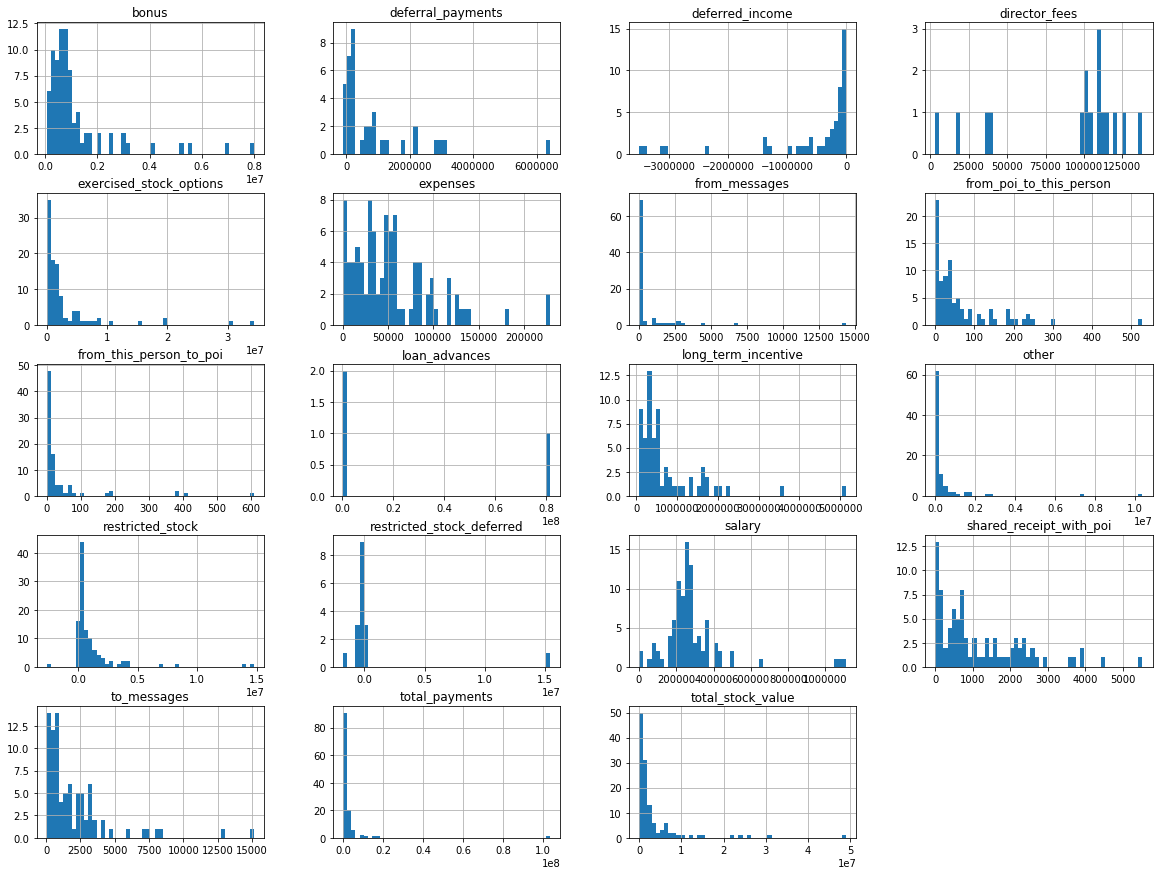

In [14]:
df_modified.transpose().hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
corr_matrix = df.drop(['email_address']).astype(float).transpose().corr()

corr_matrix['poi'].sort_values(ascending=False)

poi                          1.000000
loan_advances                0.560178
shared_receipt_with_poi      0.228313
from_poi_to_this_person      0.167722
from_this_person_to_poi      0.112940
to_messages                  0.058954
exercised_stock_options      0.052886
total_payments               0.040130
total_stock_value            0.025163
deferred_income              0.014201
restricted_stock            -0.000107
other                       -0.012457
bonus                       -0.013837
long_term_incentive         -0.021222
salary                      -0.030884
expenses                    -0.044508
from_messages               -0.074308
deferral_payments           -0.084502
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [16]:
df = df.drop(['TOTAL', 'LOCKHART EUGENE E', 'THE TRAVEL AGENCY IN THE PARK'], axis=1)
corr_matrix = df.drop(['email_address']).astype(float).transpose().corr()

corr_matrix['poi'].sort_values(ascending=False)

poi                          1.000000
loan_advances                0.999851
exercised_stock_options      0.503551
total_stock_value            0.366462
bonus                        0.302384
salary                       0.264976
long_term_incentive          0.254723
total_payments               0.230102
shared_receipt_with_poi      0.228313
restricted_stock             0.224814
from_poi_to_this_person      0.167722
other                        0.120270
from_this_person_to_poi      0.112940
expenses                     0.060292
to_messages                  0.058954
from_messages               -0.074308
deferral_payments           -0.098428
deferred_income             -0.265698
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [17]:
print (df.transpose()['loan_advances'][df.transpose()['loan_advances']!='NaN'])

FREVERT MARK A       2000000
LAY KENNETH L       81525000
PICKERING MARK R      400000
Name: loan_advances, dtype: object


In [18]:
#salary_median = df.transpose()['salary'].astype(float).median()
#print("Salary median:", salary_median)
#df.transpose()['salary'] = df.transpose()['salary'].astype(float).fillna(salary_median)
#df.transpose()['salary']
df.transpose().mean()
df.transpose().fillna(df.transpose().mean())

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


In [19]:
df = df.drop(['email_address']).transpose().astype(float)
df = df.astype(float)

In [20]:
#df['salary'] = df['salary'].astype(float).fillna(df['salary'].mean())
#df['expenses'] = df['expenses'].astype(float).fillna(df['expenses'].mean())
#df['other'] = df['other'].astype(float).fillna(df['other'].mean())

In [21]:
corr_matrix = df.corr()

corr_matrix['poi'].sort_values(ascending=False)

poi                          1.000000
loan_advances                0.999851
exercised_stock_options      0.503551
total_stock_value            0.366462
bonus                        0.302384
salary                       0.264976
long_term_incentive          0.254723
total_payments               0.230102
shared_receipt_with_poi      0.228313
restricted_stock             0.224814
from_poi_to_this_person      0.167722
other                        0.120270
from_this_person_to_poi      0.112940
expenses                     0.060292
to_messages                  0.058954
from_messages               -0.074308
deferral_payments           -0.098428
deferred_income             -0.265698
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [22]:
#df = df.fillna(df.mean())
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

In [23]:
imputer.fit(df)
X = imputer.transform(df)
df = DataFrame(X, columns=df.columns)

In [24]:
corr_matrix = df.corr()

corr_matrix['poi'].sort_values(ascending=False)

poi                          1.000000
exercised_stock_options      0.401957
total_stock_value            0.377516
bonus                        0.317647
salary                       0.267665
long_term_incentive          0.236995
restricted_stock             0.236880
total_payments               0.236250
shared_receipt_with_poi      0.223100
loan_advances                0.221708
from_poi_to_this_person      0.170582
other                        0.164212
from_this_person_to_poi      0.123589
expenses                     0.084317
to_messages                  0.078147
director_fees                0.048598
restricted_stock_deferred   -0.026251
from_messages               -0.036664
deferral_payments           -0.043718
deferred_income             -0.260374
Name: poi, dtype: float64

In [25]:
to_poi_idx = df.columns.get_loc('from_this_person_to_poi')
from_poi_idx = df.columns.get_loc('from_poi_to_this_person')
shared_poi_idx = df.columns.get_loc('shared_receipt_with_poi')
from_messages_idx = df.columns.get_loc('from_messages')
to_messages_idx = df.columns.get_loc('to_messages')

from sklearn.base import BaseEstimator, TransformerMixin


class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_related_messages=True):
        self.add_related_messages = add_related_messages

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.add_related_messages:
            poi_related_messages = X[:, from_poi_idx] + X[:, to_poi_idx]
            return np.c_[X, poi_related_messages]
        else:
            return X  # np.c_[X, poi_related_messages]

In [26]:
from sklearn.pipeline import BaseEstimator, TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [27]:
df_full = DataFrame(data_dict).transpose()
df_labels = df_full['poi'].astype(float)
df_full = df_full.drop(['email_address','poi'], axis=1).astype(float)


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

attributes = list(df_full)

full_pipeline = Pipeline([
    ('selector', DataFrameSelector(attributes)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributeAdder(add_related_messages=True)),
    ('std_scaler', StandardScaler())
])

In [29]:
pois_prepared = full_pipeline.fit_transform(df_full)

In [30]:
pois_prepared_full = np.column_stack((pois_prepared,df_labels.values))
#pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns)+["poi"])
pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns)+["poi_related_messages", "poi"])

In [31]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(pois_prepared, df_labels, test_size=0.3, random_state=42)



In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)

clf.fit(features_train, labels_train)

LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)

In [33]:
pred = clf.predict(features_test)


In [34]:
from sklearn.metrics import recall_score, confusion_matrix, make_scorer

f1_score_temp = recall_score(labels_test, pred)
print(f1_score_temp)
print (confusion_matrix(labels_test, pred))

1.0
[[33  8]
 [ 0  3]]


In [35]:
my_dataset = pois_prepared_full.transpose().to_dict()


In [36]:
from tester import test_classifier
features_list = list(df_full.columns)
features_list = ['poi'] + features_list
test_classifier(clf, my_dataset, features_list, folds=1000)

/home/intranet.biblostravel.com/igabbarini/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)
	Accuracy: 0.76673	Precision: 0.29209	Recall: 0.52650	F1: 0.37574	F2: 0.45368
	Total predictions: 15000	True positives: 1053	False positives: 2552	False negatives:  947	True negatives: 10448



In [37]:
#Now I remove the outliers
df_full = DataFrame(data_dict).transpose()
index_list = ['TOTAL', "LOCKHART EUGENE E", "THE TRAVEL AGENCY IN THE PARK", "FREVERT MARK A"]
df_full.drop(index_list, inplace=True)
df_labels = df_full['poi'].astype(float)
df_full = df_full.drop(['email_address','poi'], axis=1).astype(float)

#And now execute the same test
pois_prepared = full_pipeline.fit_transform(df_full)
pois_prepared_full = np.column_stack((pois_prepared,df_labels.values))
pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns)+["poi_related_messages", "poi"])
#pois_prepared_full = pd.DataFrame(pois_prepared_full, columns=list(df_full.columns)+["poi"])
my_dataset = pois_prepared_full.transpose().to_dict()
features_list = list(df_full.columns)
features_list = ['poi'] + features_list
test_classifier(clf, my_dataset, features_list, folds=1000)

LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)
	Accuracy: 0.77587	Precision: 0.33614	Recall: 0.69850	F1: 0.45387	F2: 0.57461
	Total predictions: 15000	True positives: 1397	False positives: 2759	False negatives:  603	True negatives: 10241



A recall of .6985. A Great improvement!

Now lets try another classifiers Starting with KNeighborsClassifier

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
params = {"n_neighbors": [2, 3], "p": [2]}
clf = KNeighborsClassifier(n_neighbors=3, p=2)
#clf = GridSearchCV(clf, params)
test_classifier(clf, my_dataset, features_list, folds=1000)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.85053	Precision: 0.37100	Recall: 0.17400	F1: 0.23690	F2: 0.19467
	Total predictions: 15000	True positives:  348	False positives:  590	False negatives: 1652	True negatives: 12410



A really awful performance.
Let's try DecissionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=7, criterion='entropy')
#params_tree = {"min_samples_split": [2, 5, 10, 20], "criterion": ('gini', 'entropy')}

test_classifier(clf, my_dataset, features_list, folds=1000)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80513	Precision: 0.24318	Recall: 0.21850	F1: 0.23018	F2: 0.22303
	Total predictions: 15000	True positives:  437	False positives: 1360	False negatives: 1563	True negatives: 11640



A little bit better but not the desired.

Now with AdaBoostClassifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
clf = AdaBoostClassifier(n_estimators=26)
#params_adaboost = {"n_estimators": [20, 25, 30, 40, 50, 100]}
test_classifier(clf, my_dataset, features_list, folds=1000)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=26, random_state=None)
	Accuracy: 0.81753	Precision: 0.25612	Recall: 0.19350	F1: 0.22045	F2: 0.20345
	Total predictions: 15000	True positives:  387	False positives: 1124	False negatives: 1613	True negatives: 11876



In [41]:
from sklearn.preprocessing.data import MinMaxScaler
from sklearn.decomposition.pca import PCA
clf = Pipeline(steps=[('minmaxer', MinMaxScaler(copy=True, feature_range=(0, 1))), 
                      ('reducer', PCA(copy=True, n_components=2, whiten=True)), 
                      ('classifier', LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False))])
test_classifier(clf, my_dataset, features_list, folds=1000)

Pipeline(steps=[('minmaxer', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reducer', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('classifier', LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False))])
	Accuracy: 0.76333	Precision: 0.31107	Recall: 0.63800	F1: 0.41822	F2: 0.52719
	Total predictions: 15000	True positives: 1276	False positives: 2826	False negatives:  724	True negatives: 10174



In [42]:
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import make_scorer

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
cv = StratifiedShuffleSplit(labels, 1000, random_state = 42)
clf_log = LogisticRegression()
params_log = {"C": [0.00005,0.0005, 0.005, 0.05, 0.5, 1, 10, 10 ** 2, 10 ** 5, 10 ** 10, 10 ** 20],
                  "tol": [1000 ** -1,100 ** -1,10 ** -1, 10 ** -5, 10 ** -10],
                  "class_weight": ['balanced']
                  }

scorer = make_scorer(recall_score)
grid = GridSearchCV(clf_log, param_grid=params_log, cv=cv, scoring=scorer)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

The best parameters are {'C': 0.0005, 'class_weight': 'balanced', 'tol': 0.1} with a score of 0.70
LogisticRegression(C=0.0005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)
	Accuracy: 0.77587	Precision: 0.33614	Recall: 0.69850	F1: 0.45387	F2: 0.57461
	Total predictions: 15000	True positives: 1397	False positives: 2759	False negatives:  603	True negatives: 10241



In [43]:
from sklearn.neural_network import BernoulliRBM

logistic = LogisticRegression()
rbm = BernoulliRBM()
clf_rbm = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
params_rbm = {
        "logistic__tol": [100 ** -1,10 ** -1],
        "logistic__C": [0.0005, 0.005],
        "logistic__class_weight": ['balanced'],
        "rbm__n_components": [2, 3, 4]
    }

scorer = make_scorer(recall_score)
grid = GridSearchCV(clf_rbm, param_grid=params_rbm, cv=cv, scoring=scorer)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

The best parameters are {'logistic__C': 0.005, 'logistic__class_weight': 'balanced', 'logistic__tol': 0.1, 'rbm__n_components': 4} with a score of 0.66
Pipeline(steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=4, n_iter=10,
       random_state=None, verbose=0)), ('logistic', LogisticRegression(C=0.005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False))])
	Accuracy: 0.78273	Precision: 0.33921	Recall: 0.66400	F1: 0.44903	F2: 0.55728
	Total predictions: 15000	True positives: 1328	False positives: 2587	False negatives:  672	True negatives: 10413



In [55]:
clf_tree = DecisionTreeClassifier()
params_tree = {"min_samples_split": [2, 5,6,  7], "criterion": ['gini', 'entropy']}

scorer = make_scorer(recall_score)
grid = GridSearchCV(clf_tree, param_grid=params_tree, cv=cv, scoring=scorer)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

The best parameters are {'criterion': 'entropy', 'min_samples_split': 7} with a score of 0.22
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80447	Precision: 0.24126	Recall: 0.21750	F1: 0.22877	F2: 0.22187
	Total predictions: 15000	True positives:  435	False positives: 1368	False negatives: 1565	True negatives: 11632



In [56]:
clf_adaboost = AdaBoostClassifier()
params_adaboost = {"n_estimators": [20, 25, 30, 40, 50, 100]}

scorer = make_scorer(recall_score)
grid = GridSearchCV(clf_adaboost, param_grid=params_adaboost, cv=cv, scoring=scorer)
grid.fit(features, labels)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

test_classifier(grid.best_estimator_, my_dataset, features_list, folds=1000)

The best parameters are {'n_estimators': 100} with a score of 0.23
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)
	Accuracy: 0.83167	Precision: 0.31758	Recall: 0.22850	F1: 0.26577	F2: 0.24208
	Total predictions: 15000	True positives:  457	False positives:  982	False negatives: 1543	True negatives: 12018

